# Cars93 Tutorial

In [1]:
library(dbscan)
library(ggplot2)
library(MASS)
library(FactoMineR)
library(repr)
library(scatterplot3d)
library(uwot)
library(kernlab)
library(microbenchmark)


Attaching package: ‘dbscan’


The following object is masked from ‘package:stats’:

    as.dendrogram


Loading required package: Matrix


Attaching package: ‘kernlab’


The following object is masked from ‘package:ggplot2’:

    alpha




In [2]:
options(repr.plot.width=6, repr.plot.height=6)

Functions for tSNE.

In [3]:
source("./functions.R")

Opening the data

In [5]:
data(Cars93)

In [6]:
head(Cars93)

,Manufacturer,Model,Type,Min.Price,Price,Max.Price,MPG.city,MPG.highway,AirBags,DriveTrain,⋯,Passengers,Length,Wheelbase,Width,Turn.circle,Rear.seat.room,Luggage.room,Weight,Origin,Make
,<fct>,<fct>,<fct>,<dbl>,<dbl>,<dbl>,<int>,<int>,<fct>,<fct>,⋯,<int>,<int>,<int>,<int>,<int>,<dbl>,<int>,<int>,<fct>,<fct>
1,Acura,Integra,Small,12.9,15.9,18.8,25,31,None,Front,⋯,5,177,102,68,37,26.5,11,2705,non-USA,Acura Integra
2,Acura,Legend,Midsize,29.2,33.9,38.7,18,25,Driver & Passenger,Front,⋯,5,195,115,71,38,30.0,15,3560,non-USA,Acura Legend
3,Audi,90,Compact,25.9,29.1,32.3,20,26,Driver only,Front,⋯,5,180,102,67,37,28.0,14,3375,non-USA,Audi 90
4,Audi,100,Midsize,30.8,37.7,44.6,19,26,Driver & Passenger,Front,⋯,6,193,106,70,37,31.0,17,3405,non-USA,Audi 100
5,BMW,535i,Midsize,23.7,30.0,36.2,22,30,Driver only,Rear,⋯,4,186,109,69,39,27.0,13,3640,non-USA,BMW 535i
6,Buick,Century,Midsize,14.2,15.7,17.3,22,31,Driver only,Front,⋯,6,189,105,69,41,28.0,16,2880,USA,Buick Century


In [7]:
Cars93 <- Cars93[,c("Origin","Manufacturer","Model","Type","Min.Price","Price","Max.Price","MPG.city","MPG.highway","Passengers",
                   "Length","Wheelbase","Width","Turn.circle","Weight")]

In [9]:
X <- Cars93[c("Min.Price","Price","Max.Price","MPG.city","MPG.highway","Passengers",
                   "Length","Wheelbase","Width","Turn.circle","Weight")]

In [10]:
labels <- Cars93[c("Origin","Manufacturer","Model","Type")]

## Plot two dimensions

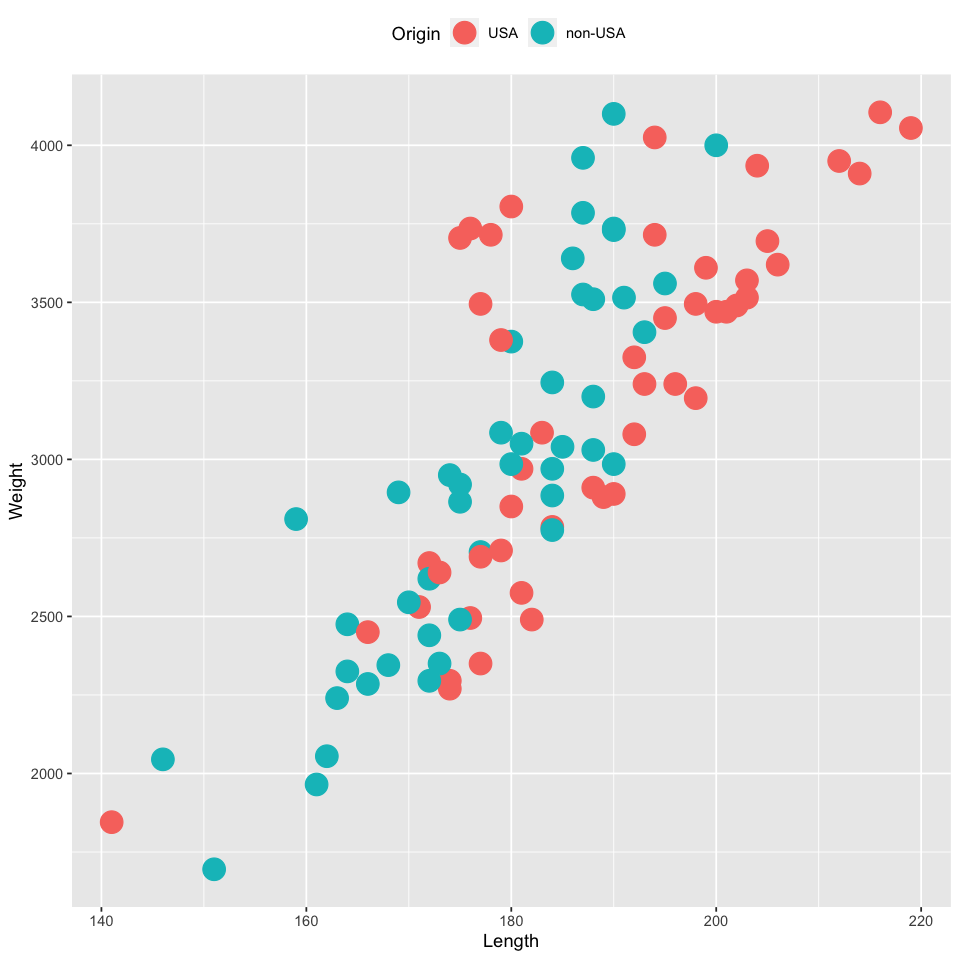

In [15]:
options(repr.plot.width=8, repr.plot.height=8)
ggplot(Cars93, aes(x=Length, y=Weight, color=Origin)) +
  geom_point(size=6) + 
  theme(legend.position="top")

## Plot three dimensions

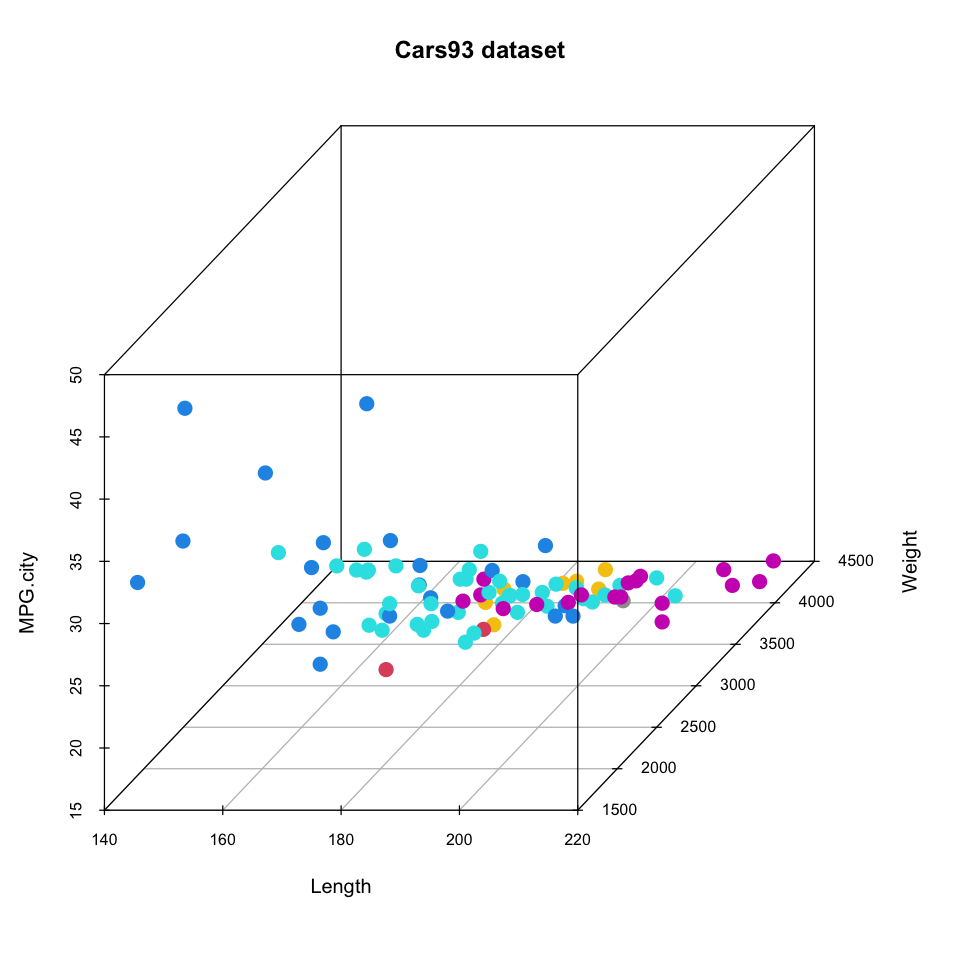

In [21]:
scatterplot3d(Cars93[["Length"]],  
              Cars93[["Weight"]],
              Cars93[["MPG.city"]],
              xlab="Length",
              ylab="Weight",
              zlab="MPG.city",
              color = Cars93[["Passengers"]],
              main = "Cars93 dataset",
              lwd=5, pch=19, angle=60)

## Curse of dimensionality

Calculate distances in 1, 2, 3, ..., 8 dimensions for Cars93 data and plot the histogram

In [25]:
Distance <-  as.vector(as.matrix( dist(X[,4]) ))
L <- length(Distance)
Dimension <- rep(1, L)
Distance <- c(Distance, as.vector(as.matrix( dist(X[,4:5]) )))
Dimension <- c(Dimension, rep(2, L))
Distance <- c(Distance, as.vector(as.matrix( dist(X[,4:6]) )))
Dimension <- c(Dimension, rep(3, L))
Distance <- c(Distance, as.vector(as.matrix( dist(X[,4:7]) )))
Dimension <- c(Dimension, rep(4, L))
Distance <- c(Distance, as.vector(as.matrix( dist(X[,4:8]) )))
Dimension <- c(Dimension, rep(5, L))
Distance <- c(Distance, as.vector(as.matrix( dist(X[,4:9]) )))
Dimension <- c(Dimension, rep(6, L))
Distance <- c(Distance, as.vector(as.matrix( dist(X[,4:10]) )))
Dimension <- c(Dimension, rep(7, L))
Distance <- c(Distance, as.vector(as.matrix( dist(X[,4:11]) )))
Dimension <- c(Dimension, rep(8, L))

In [28]:
D <- as.data.frame(log(Distance))
colnames(D) <- c("distance")
D["dimension"] <- factor(Dimension)

`stat_bin()` using `bins = 30`. Pick better value with `binwidth`.

Warning message:
“Removed 1484 rows containing non-finite values (stat_bin).”


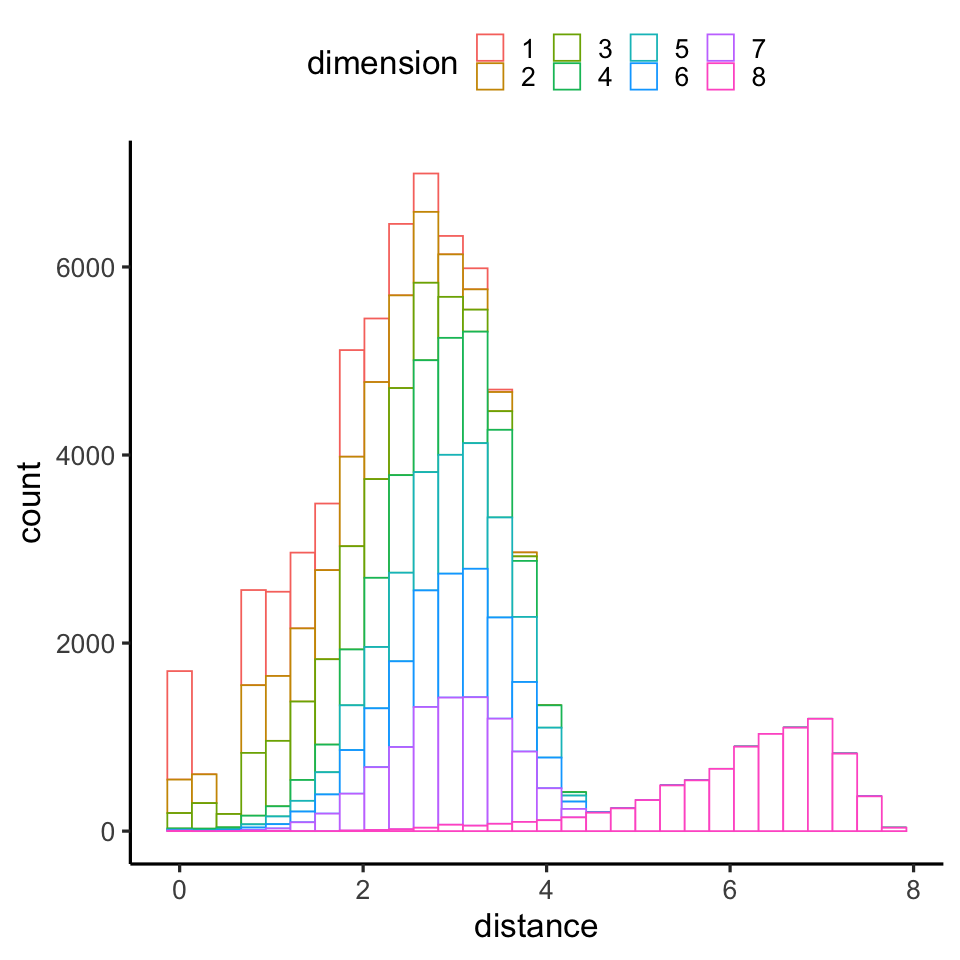

In [29]:
ggplot(D, aes(x=distance, color=dimension)) +
  geom_histogram(fill="white") + theme_classic(base_size = 20) +
  theme(legend.position="top")

## Parametric projections

### PCA

The function PCA is part of the package `FactomineR`

In [30]:
PCA = FactoMineR::PCA(X, ncp = 2)

In [31]:
Y_PCA = as.data.frame(PCA$ind$coord)

In [36]:
Y_PCA <- cbind(Y_PCA,labels)

In [40]:
Y_PCA

,Dim.1,Dim.2,labels,Origin,Manufacturer,Model,Type
,<dbl>,<dbl>,<fct>,<fct>,<fct>,<fct>,<fct>
1,-1.35569049,-0.07405808,non-USA,non-USA,Acura,Integra,Small
2,2.84170623,1.46186188,non-USA,non-USA,Acura,Legend,Midsize
3,0.76394989,1.68266660,non-USA,non-USA,Audi,90,Compact
4,2.47132896,1.99413526,non-USA,non-USA,Audi,100,Midsize
5,1.25724989,1.68005828,non-USA,non-USA,BMW,535i,Midsize
6,-0.02377299,-1.11251102,USA,USA,Buick,Century,Midsize
7,2.18133947,-1.14652569,USA,USA,Buick,LeSabre,Large
8,4.38073885,-1.59806326,USA,USA,Buick,Roadmaster,Large
9,2.18615660,0.30702067,USA,USA,Buick,Riviera,Midsize


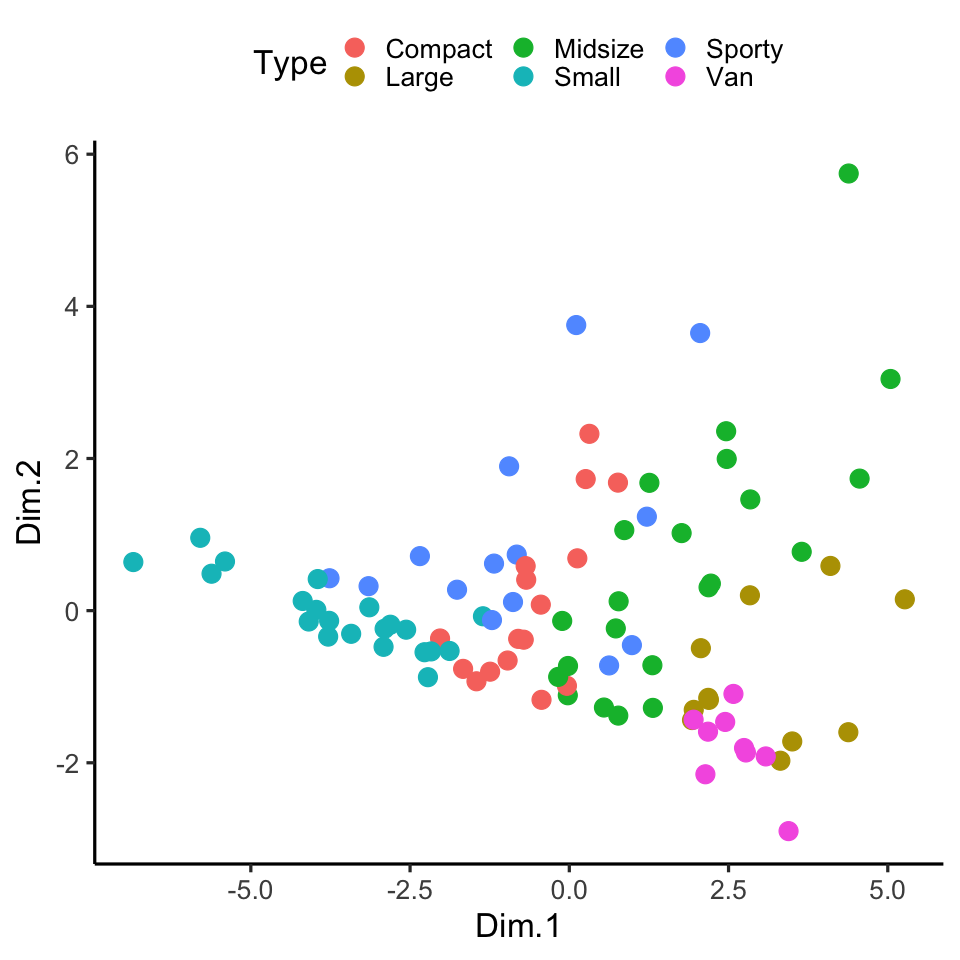

In [43]:
ggplot(Y_PCA, aes(x=Dim.1, y=Dim.2, color=Type)) +
  geom_point(size=5) + theme_classic(base_size = 20) +
  theme(legend.position="top")

### Kernel PCA 

is contained in the package `kernlab`. Try out other kernel types beyond the gaussian one. Type `help(kpca)` to see how to use the options. Remember to standardize the data first. other packages do that internally.

In [72]:
X_std = apply(X, 2, function(x){(x-mean(x))/sd(x)})

In [98]:
Y_kpca = kernlab::kpca(as.matrix(X_std), 
     features = 2,
     kernel = "rbfdot", 
     kpar = list(sigma = 1),
     th = 1e-4, 
     na.action = na.omit)

In [99]:
Y_kpca = as.data.frame(Y_kpca@pcv)

In [100]:
Y_kpca <- cbind(Y_kpca,labels)

In [101]:
colnames(Y_kpca)[1:2] <- c("Dim.1","Dim.2")

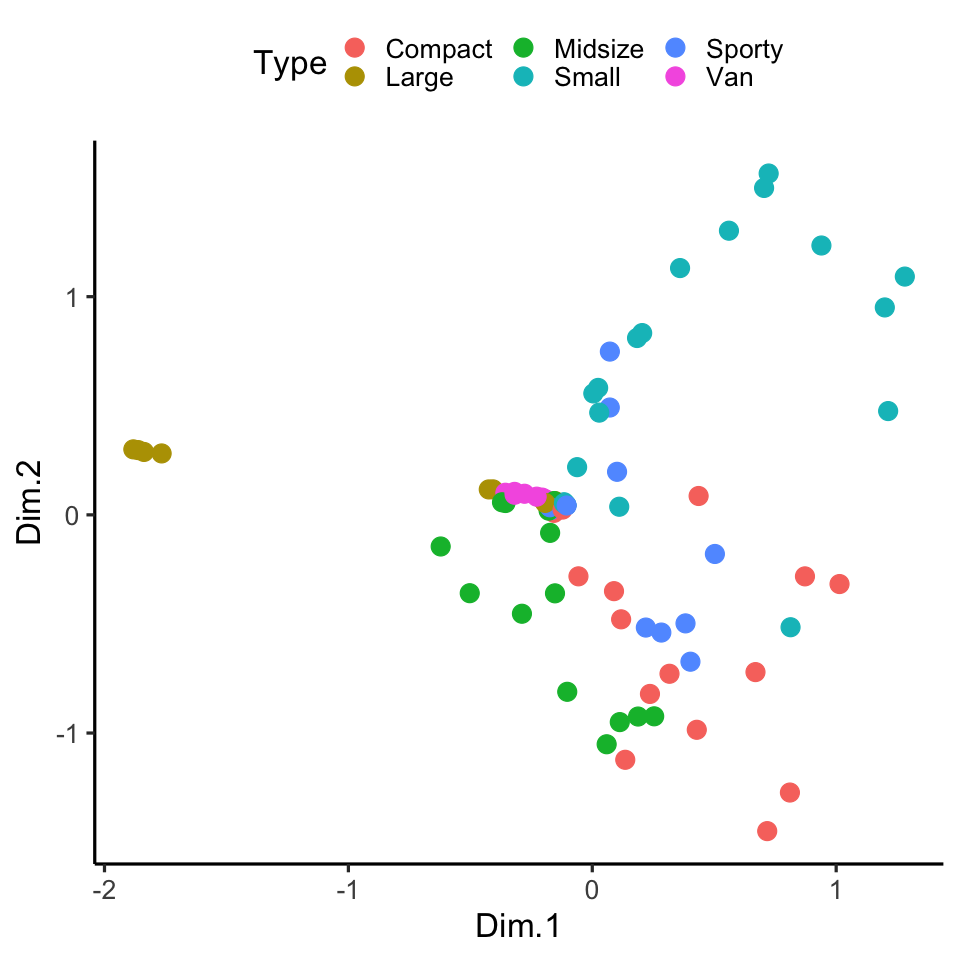

In [102]:
ggplot(Y_kpca, aes(x=Dim.1, y=Dim.2, color=Type)) +
  geom_point(size=5) + theme_classic(base_size = 20) +
  theme(legend.position="top")

### Linear Discriminant Analysis

contained in the `MASS` package. The functions run a regression based on the projection,so we provide prior probabilities for each class (they give weight to each class). `formula = Species ~ .` means that all the variables apart from thhe species labels are part of the regression (projection)

In [103]:
names(X)

[1] "Min.Price"   "Price"       "Max.Price"   "MPG.city"    "MPG.highway"
 [6] "Passengers"  "Length"      "Wheelbase"   "Width"       "Turn.circle"
[11] "Weight"

In [106]:
Y_lda <- lda(formula = Type ~ Min.Price+Price+Max.Price+MPG.city+MPG.highway+Passengers+Length+Wheelbase+Width+Turn.circle+Weight, 
          data = Cars93)

In [107]:
Y_lda$scaling

,LD1,LD2,LD3,LD4,LD5
Min.Price,0.640519487,0.804568534,-5.1047898834,-0.354937374,-4.028979e+00
Price,-1.134000607,-1.686089866,10.3405289222,0.485379362,8.126062e+00
Max.Price,0.512985567,0.829956742,-5.1867499511,-0.182774869,-4.015360e+00
MPG.city,0.019866190,0.196985297,-0.0100327095,-0.134916021,4.480045e-01
MPG.highway,0.004700117,-0.118455096,0.1464779685,0.008608072,-3.767182e-01
Passengers,1.394635583,0.948004957,0.9025350222,-0.096750690,-1.285119e-01
Length,-0.069024965,-0.111074437,0.0861353966,0.007490502,9.660323e-03
Wheelbase,0.217485540,-0.034768862,0.0491903171,-0.026997704,-9.651538e-03
Width,0.001126690,0.175990865,-0.3238953325,-0.618151990,1.391892e-01
Turn.circle,0.066940810,-0.114317636,-0.1191824537,0.124513752,-1.443427e-01


In [110]:
LD <- as.character(Y_lda$scaling[,"LD1"])
FEATURE <- rownames(Y_lda$scaling)
cat("regression for LD1 = ")
for(i in 1:10) cat(LD[i],"*",FEATURE[i], "+", sep="") 
cat(LD[i+1],"*",FEATURE[i+1], "\n", sep="")
LD <- as.character(Y_lda$scaling[,"LD2"])
FEATURE <- rownames(Y_lda$scaling)
cat("regression for LD2 = ")
for(i in 1:10) cat(LD[i],"*",FEATURE[i], "+", sep="") 
cat(LD[i+1],"*",FEATURE[i+1], "\n", sep="")

regression for LD1 = 0.640519486731084*Min.Price+-1.13400060743348*Price+0.512985567354703*Max.Price+0.0198661902658563*MPG.city+0.00470011689765054*MPG.highway+1.39463558312336*Passengers+-0.0690249649542486*Length+0.217485540143063*Wheelbase+0.00112669044164944*Width+0.0669408102745678*Turn.circle+0.00188728205068819*Weight
regression for LD2 = 0.804568533506422*Min.Price+-1.68608986609077*Price+0.829956742337601*Max.Price+0.196985297471846*MPG.city+-0.118455096276973*MPG.highway+0.948004956793083*Passengers+-0.111074436514273*Length+-0.0347688622211409*Wheelbase+0.175990865070164*Width+-0.114317636488105*Turn.circle+0.00130505209911273*Weight


We calculate those features using some good old vectorization in R. First take the coefficients

In [111]:
coeff_LD1 <- matrix(rep(Y_lda$scaling[,"LD1"],dim(X)[1]),
       nrow=dim(X)[1], byrow=T)

In [112]:
coeff_LD2 <- matrix(rep(Y_lda$scaling[,"LD2"],dim(X)[1]),
       nrow=dim(X)[1], byrow=T)

Then multiply by the data and do the sum by rows

In [113]:
LD1 = rowSums(X * coeff_LD1)

In [114]:
LD2 = rowSums(X * coeff_LD2)

make a proper dataframe and plot

In [115]:
Y_LDAplot <- data.frame(
                 matrix(c(LD1,LD2),
                    nrow=dim(X)[1],
                    byrow=F)
                  )
colnames(Y_LDAplot) <- c("LD1","LD2")

In [116]:
Y_LDAplot <- cbind(Y_LDAplot,labels)

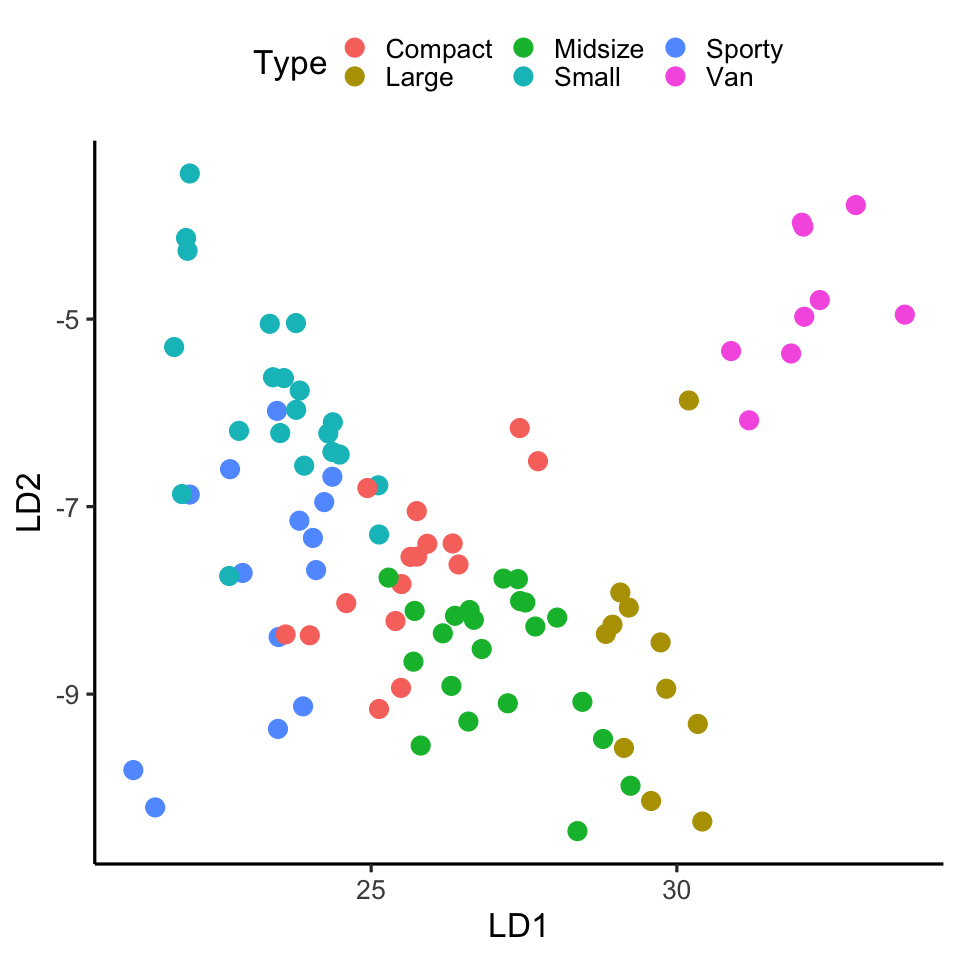

In [117]:
ggplot(Y_LDAplot, aes(x=LD1, y=LD2, color=Type)) +
  geom_point(size=5) + theme_classic(base_size = 20) +
  theme(legend.position="top")

## Non-parametric methods

### tSNE

From the code in the book or your own improved code. 

Run your personal tSNE function (in my case `sam_tsne`) or the one from the book (`casl_tsne`). Here `init`, `momentum` and `early_ex` are not options found in `casl_tsne`

In [148]:
Y_tsne <- sam_tsne(X_std, init = FALSE,
                    momentum=list(init=.7, final=.9, iter=200L),
                    early_ex=list(factor=12, iter=200L), 
                    perplexity = 5, rho=100)

In [149]:
Y_tsne = as.data.frame(Y_tsne)

In [150]:
colnames(Y_tsne) <- c("tSNE1", "tSNE2")

In [151]:
Y_tsne <- cbind(Y_tsne,labels)

In [152]:
summary(Y_tsne)

     tSNE1             tSNE2              Origin      Manufacturer     Model   
 Min.   :-30.129   Min.   :-15.1756   USA    :48   Chevrolet: 8    100    : 1  
 1st Qu.:-12.382   1st Qu.: -5.0576   non-USA:45   Ford     : 8    190E   : 1  
 Median :  0.938   Median : -0.4742                Dodge    : 6    240    : 1  
 Mean   :  0.000   Mean   :  0.0000                Mazda    : 5    300E   : 1  
 3rd Qu.: 11.962   3rd Qu.:  5.2250                Pontiac  : 5    323    : 1  
 Max.   : 28.239   Max.   : 17.5186                Buick    : 4    535i   : 1  
                                                   (Other)  :57    (Other):87  
      Type   
 Compact:16  
 Large  :11  
 Midsize:22  
 Small  :21  
 Sporty :14  
 Van    : 9  
             

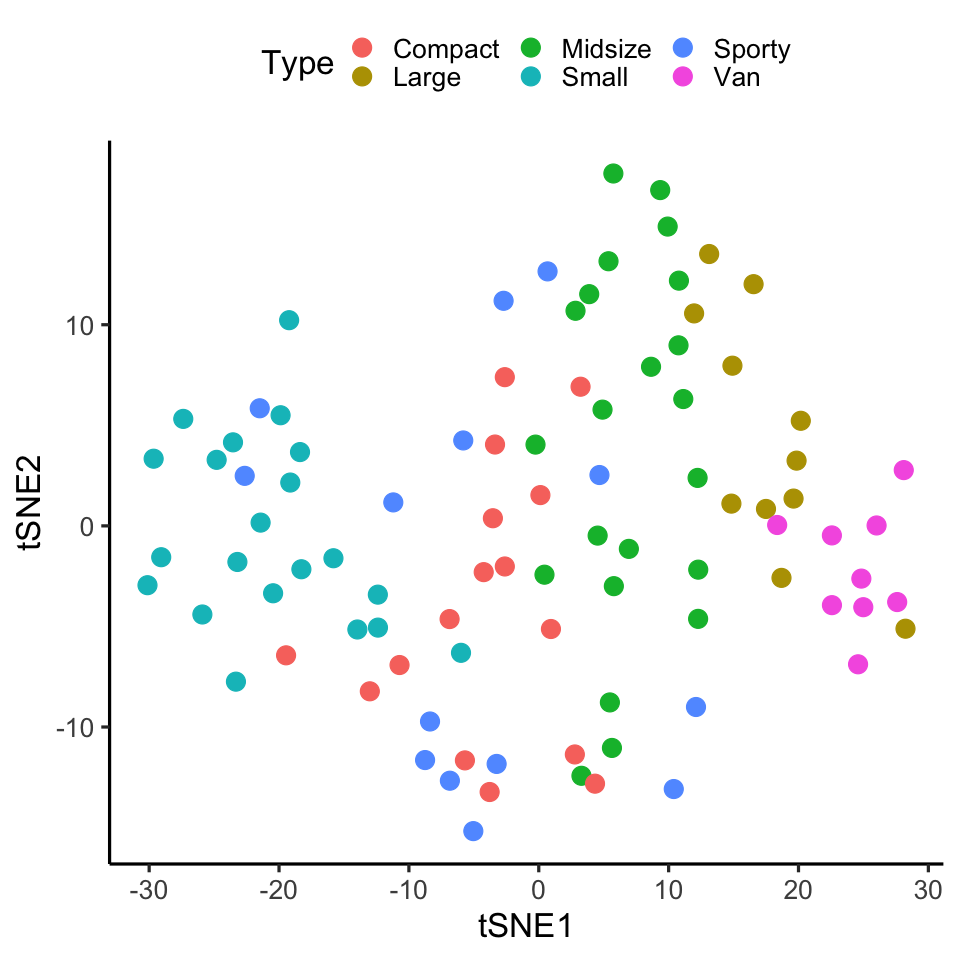

In [153]:
ggplot(Y_tsne, aes(x=tSNE1, y=tSNE2, color=Type)) +
  geom_point(size=5) + theme_classic(base_size = 20) +
  theme(legend.position="top")

#### Benchmarking the tSNEs 

Benchmarking improved tSNE VS tSNE from the book CASL and showing execution time (in seconds)

In [154]:
#MB <- microbenchmark("Improved" = { sam_tsne(X_std, init = PCA$ind$coord,
#                                    momentum=list(init=.5, final=.9, iter=200L),
#                                    early_ex=list(factor=12, iter=200L), 
#                                    perplexity = 10, rho=100) },
#                     "CASL" =  { casl_tsne(X_std, init = PCA$ind$coord,
#                                    perplexity = 20, rho=100) },
#                      times=1 )

In [155]:
#MB['time (s)'] = MB['time']/1e9

In [156]:
#MB

### UMAP

part of the package `uwot`

In [157]:
Y_umap <- uwot::umap(X_std, n_neighbors = 10, learning_rate = 0.5, init = "random")

In [158]:
Y_umap = as.data.frame(Y_umap)

In [159]:
colnames(Y_umap) <- c("UMAP1", "UMAP2")

In [160]:
Y_umap <- cbind(Y_umap,labels)

In [161]:
summary(Y_umap)

     UMAP1             UMAP2             Origin      Manufacturer     Model   
 Min.   :-3.6777   Min.   :-1.9775   USA    :48   Chevrolet: 8    100    : 1  
 1st Qu.:-1.9682   1st Qu.:-1.2231   non-USA:45   Ford     : 8    190E   : 1  
 Median : 0.3233   Median :-0.2824                Dodge    : 6    240    : 1  
 Mean   : 0.0000   Mean   : 0.0000                Mazda    : 5    300E   : 1  
 3rd Qu.: 2.0862   3rd Qu.: 1.1374                Pontiac  : 5    323    : 1  
 Max.   : 3.3851   Max.   : 2.3419                Buick    : 4    535i   : 1  
                                                  (Other)  :57    (Other):87  
      Type   
 Compact:16  
 Large  :11  
 Midsize:22  
 Small  :21  
 Sporty :14  
 Van    : 9  
             

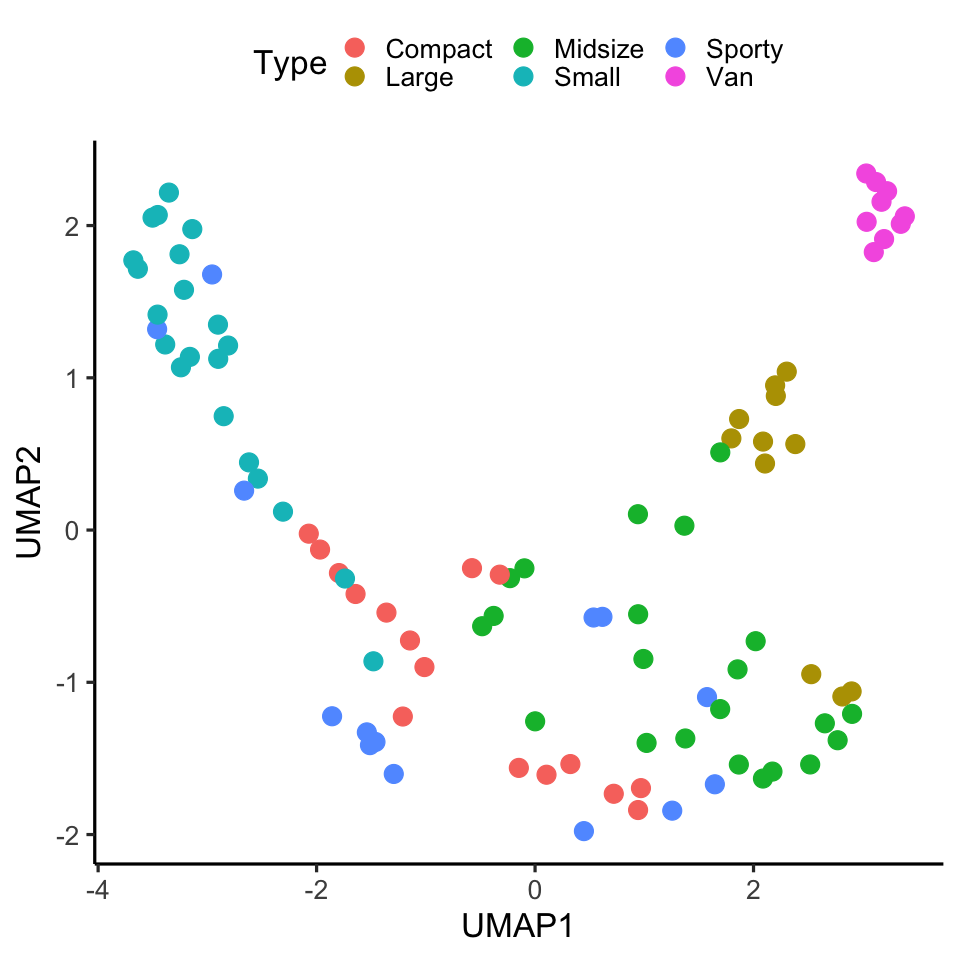

In [163]:
ggplot(Y_umap, aes(x=UMAP1, y=UMAP2, color=Type )) +
  geom_point(size=5) + theme_classic(base_size = 20) +
  theme(legend.position="top")

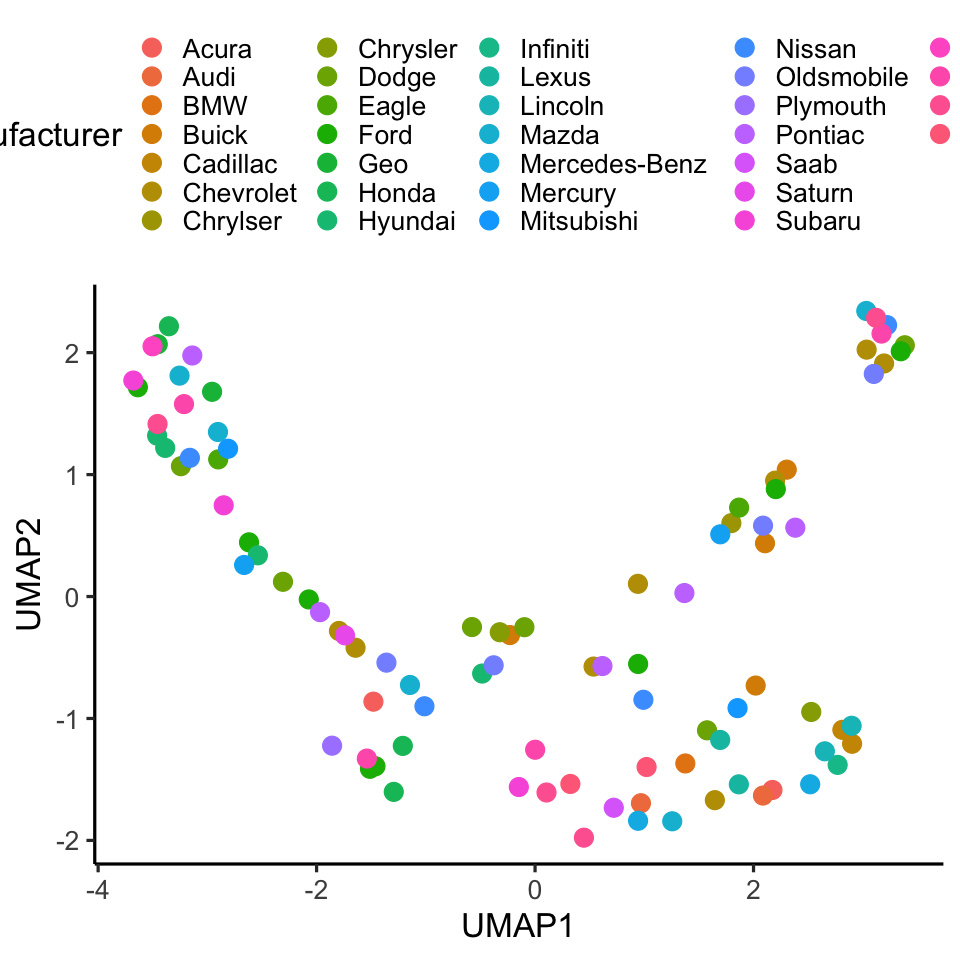

In [164]:
ggplot(Y_umap, aes(x=UMAP1, y=UMAP2, color=Manufacturer )) +
  geom_point(size=5) + theme_classic(base_size = 20) +
  theme(legend.position="top")

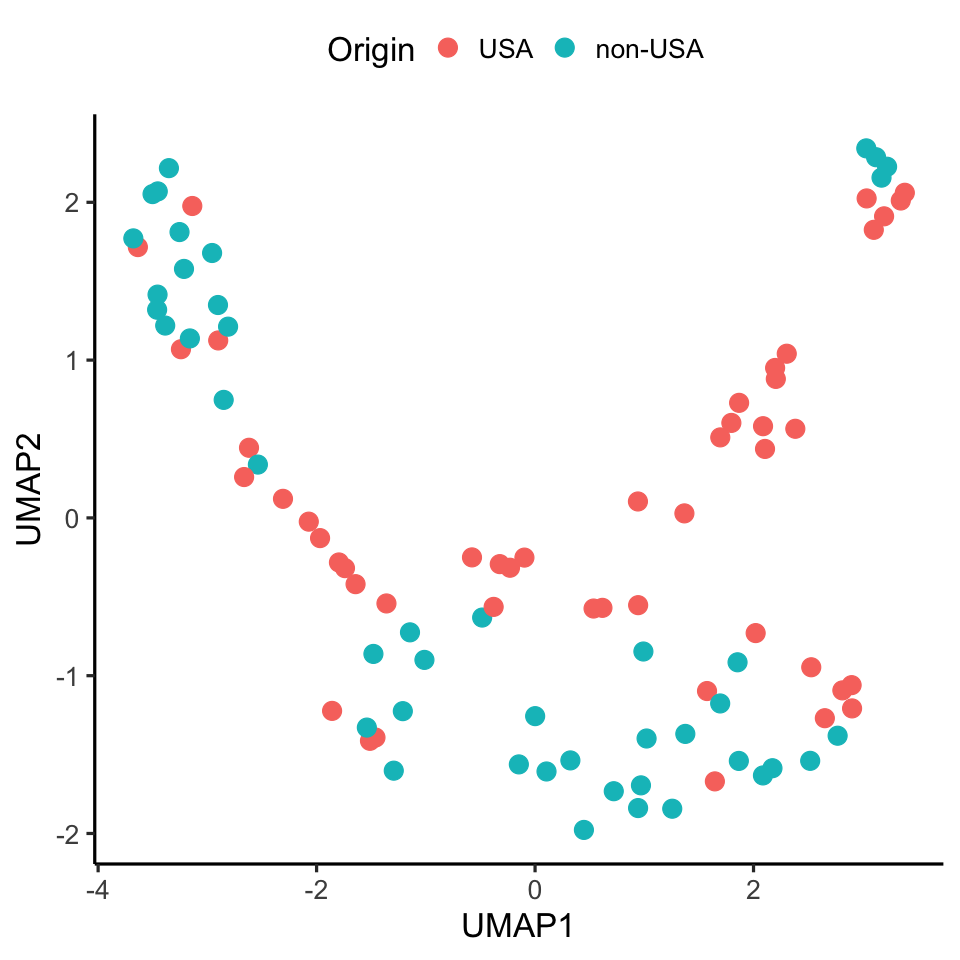

In [165]:
ggplot(Y_umap, aes(x=UMAP1, y=UMAP2, color=Origin )) +
  geom_point(size=5) + theme_classic(base_size = 20) +
  theme(legend.position="top")

## k-means clustering

k-means clustering of the umap projection to see some patterns or outliers

In [170]:
res <- stats::kmeans(x=Y_umap[,c("UMAP1","UMAP2")],
              centers=6)

In [171]:
Y_kmeans <- cbind(Y_umap, factor(res$cluster), X)

In [172]:
names(Y_kmeans)[7] <- "Clusters" 

In [173]:
head(Y_kmeans)

,UMAP1,UMAP2,Origin,Manufacturer,Model,Type,Clusters,Min.Price,Price,Max.Price,MPG.city,MPG.highway,Passengers,Length,Wheelbase,Width,Turn.circle,Weight
,<dbl>,<dbl>,<fct>,<fct>,<fct>,<fct>,<fct>,<dbl>,<dbl>,<dbl>,<int>,<int>,<int>,<int>,<int>,<int>,<int>,<int>
1,-1.4797812,-0.8620893,non-USA,Acura,Integra,Small,3,12.9,15.9,18.8,25,31,5,177,102,68,37,2705
2,2.1733288,-1.5863996,non-USA,Acura,Legend,Midsize,1,29.2,33.9,38.7,18,25,5,195,115,71,38,3560
3,0.9694432,-1.6950166,non-USA,Audi,90,Compact,2,25.9,29.1,32.3,20,26,5,180,102,67,37,3375
4,2.0862453,-1.6322079,non-USA,Audi,100,Midsize,1,30.8,37.7,44.6,19,26,6,193,106,70,37,3405
5,1.3756032,-1.3689523,non-USA,BMW,535i,Midsize,2,23.7,30.0,36.2,22,30,4,186,109,69,39,3640
6,-0.2293949,-0.3159063,USA,Buick,Century,Midsize,3,14.2,15.7,17.3,22,31,6,189,105,69,41,2880


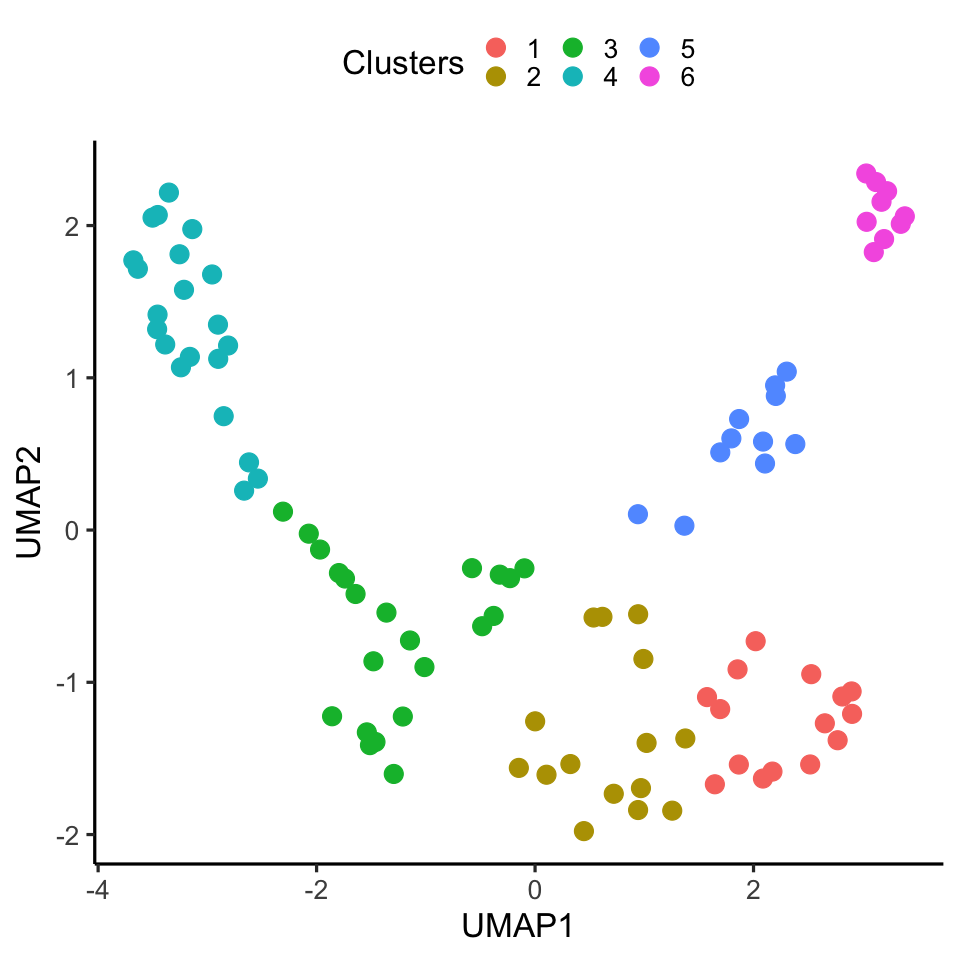

In [174]:
ggplot(Y_kmeans, aes(x=UMAP1, y=UMAP2, color=Clusters, )) +
  geom_point(size=5) + theme_classic(base_size = 20) +
  theme(legend.position="top")

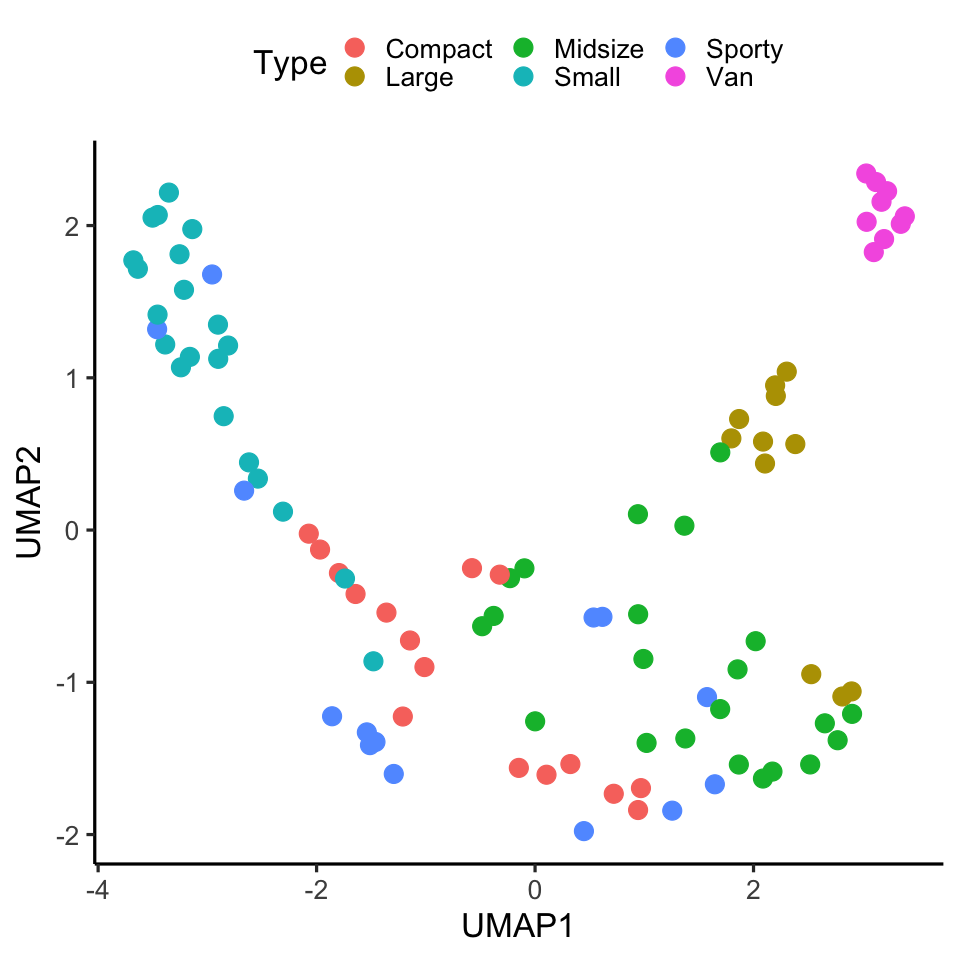

In [175]:
ggplot(Y_kmeans, aes(x=UMAP1, y=UMAP2, color=Type, )) +
  geom_point(size=5) + theme_classic(base_size = 20) +
  theme(legend.position="top")

In [178]:
A <- aggregate(. ~ Clusters, Y_kmeans[c("Weight","Clusters")], mean)
print(A)

  Clusters   Weight
1        1 3653.333
2        2 3116.667
3        3 2826.591
4        4 2281.429
5        5 3605.455
6        6 3830.556


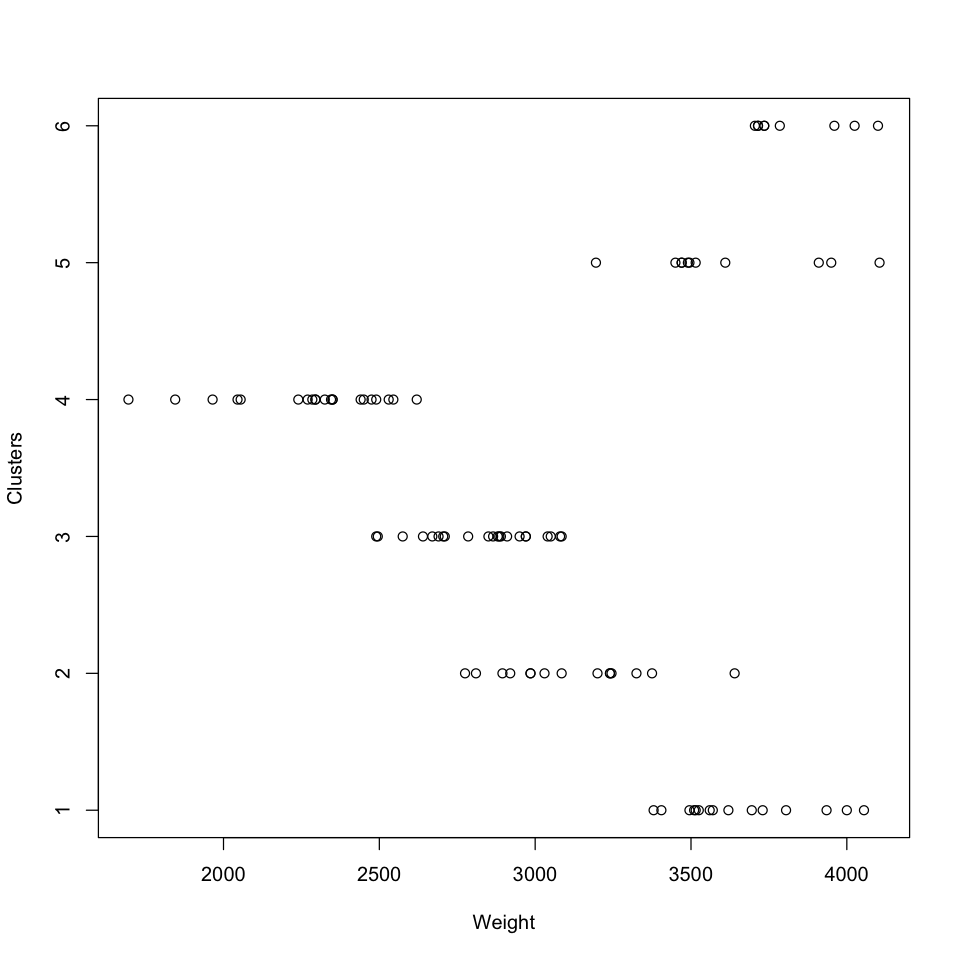

In [183]:
plot(Y_kmeans[c("Weight","Clusters")])